# Titanic Survivier Prediction Classfication Problem

In [1]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#titanic.hist(bins=30,figsize=(20,15))

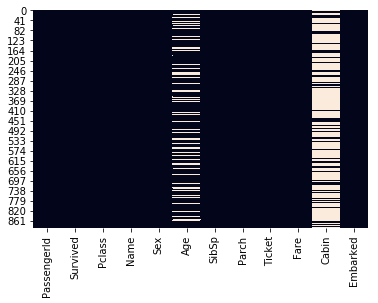

In [7]:
sns.heatmap(titanic.isnull(),cbar=False) # findout the null values

In [8]:
#titanic["Age"].isnull().sum() # count of NAN values - so we can't remove all these columns because it is too high
#titanic["Cabin"].isnull().sum() # count of NAN values - so we can't remove all these columns because it is too high
titanic["Embarked"].isnull().sum() # yes count was 2 we can remove the rows

2

In [9]:
titanic.dropna(subset= ["Embarked"] , inplace = True) # drop the row as NAN count was 2 only which is very low

In [10]:
#titanic.drop(["PassengerId"],axis = 1,inplace = True) # remove passenger column as it is just a series incremented of Integer

In [11]:
y = titanic.iloc[:,1:2]
X = titanic.iloc[:,0:].drop(["Survived"],axis =1)
#X.shape
#y.shape
#y.head()
X.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [12]:
#titanic["Name"].value_counts()
#titanic["Embarked"].value_counts()
#titanic["Cabin"].value_counts()
#titanic["Cabin"].value_counts()

In [13]:
X.drop(["Name"],axis = 1 , inplace = True)

In [14]:
X.shape

(889, 10)

In [15]:
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
X['Sex']= label_encoder.fit_transform(X['Sex']) 


In [16]:
X['Embarked']= label_encoder.fit_transform(X['Embarked']) 


In [17]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)


Survived       1.000000
Fare           0.255290
Parch          0.083151
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.082446
Pclass        -0.335549
Name: Survived, dtype: float64

In [19]:
#from pandas.plotting import scatter_matrix
#titanic.plot(kind="scatter", x="Fare", y="Age", alpha=0.8)


In [20]:
X.drop(["Cabin","Ticket"],axis=1,inplace= True)

In [21]:
X.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         2
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         2
3            4       1    0  35.0      1      0  53.1000         2
4            5       3    1  35.0      0      0   8.0500         2

In [22]:
X.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   889.000000  889.000000  889.000000  712.000000  889.000000   
mean    446.000000    2.311586    0.649044   29.642093    0.524184   
std     256.998173    0.834700    0.477538   14.492933    1.103705   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     224.000000    2.000000    0.000000   20.000000    0.000000   
50%     446.000000    3.000000    1.000000   28.000000    0.000000   
75%     668.000000    3.000000    1.000000   38.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Embarked  
count  889.000000  889.000000  889.000000  
mean     0.382452   32.096681    1.535433  
std      0.806761   49.697504    0.792088  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.454200    2.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000  512.329200    2.000000

In [23]:
from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
#titanic_pipeline = Pipeline([
 #   ('imputer', SimpleImputer(strategy="median")), #FILL NA VALUES
    #     ..... add as many as you want in your pipeline
 #   ('std_scaler', StandardScaler()), # FEATURE SCALLING
#])

#X_Pipe = titanic_pipeline.fit_transform(X)


In [25]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X)

imputer.statistics_

X_1 = imputer.transform(X)


In [26]:
X_tr = pd.DataFrame(X_1, columns=X.columns)

In [27]:
X_tr.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    2.311586    0.649044   29.315152    0.524184   
std     256.998173    0.834700    0.477538   12.984932    1.103705   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     224.000000    2.000000    0.000000   22.000000    0.000000   
50%     446.000000    3.000000    1.000000   28.000000    0.000000   
75%     668.000000    3.000000    1.000000   35.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Embarked  
count  889.000000  889.000000  889.000000  
mean     0.382452   32.096681    1.535433  
std      0.806761   49.697504    0.792088  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.454200    2.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000  512.329200    2.000000

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.20, random_state=42)

In [30]:
y_test.shape

(178, 1)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.values.ravel())

/home/dinesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = model.predict(X_test)

In [33]:
print(y_test)

     Survived
281         0
435         1
39          1
418         0
585         1
804         1
343         0
836         0
581         1
537         1
791         0
142         1
631         0
73          0
713         0
508         0
544         0
531         0
817         0
738         0
71          0
166         1
197         0
295         0
589         0
30          0
292         0
303         1
602         0
619         0
..        ...
667         0
498         0
514         0
426         1
110         0
78          1
532         0
618         1
83          0
745         0
626         0
412         1
267         1
307         1
579         1
5           0
54          0
251         0
457         1
320         0
363         0
98          1
199         0
571         1
852         0
433         0
807         0
25          1
85          1
10          1

[178 rows x 1 columns]


In [34]:
model.score(X_test,y_test)

0.8033707865168539

In [35]:
model.predict_proba(X_test)

array([[0.88420373, 0.11579627],
       [0.06961772, 0.93038228],
       [0.31593241, 0.68406759],
       [0.77122125, 0.22877875],
       [0.06501954, 0.93498046],
       [0.85580616, 0.14419384],
       [0.7500017 , 0.2499983 ],
       [0.82909487, 0.17090513],
       [0.0923094 , 0.9076906 ],
       [0.050638  , 0.949362  ],
       [0.63826168, 0.36173832],
       [0.45011882, 0.54988118],
       [0.92898717, 0.07101283],
       [0.88338782, 0.11661218],
       [0.86609194, 0.13390806],
       [0.86500876, 0.13499124],
       [0.61598035, 0.38401965],
       [0.82988601, 0.17011399],
       [0.73549172, 0.26450828],
       [0.86229659, 0.13770341],
       [0.72032097, 0.27967903],
       [0.10554712, 0.89445288],
       [0.92852488, 0.07147512],
       [0.49947648, 0.50052352],
       [0.86969789, 0.13030211],
       [0.61554461, 0.38445539],
       [0.75148045, 0.24851955],
       [0.19251336, 0.80748664],
       [0.53264632, 0.46735368],
       [0.73533969, 0.26466031],
       [0.

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[91, 18],
       [17, 52]])

Text(0.5, 257.44, 'Predicted label')

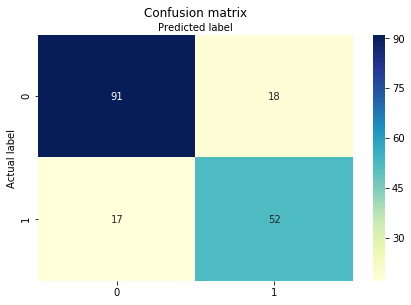

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8033707865168539
Precision: 0.7428571428571429
Recall: 0.7536231884057971


In [39]:
from joblib import dump, load
dump(model, 'titanic1.0_model.joblib')

['titanic1.0_model.joblib']